In [2]:
%pip install numpy
%pip install pandas
%pip install pandas
%pip install matplotlib
%pip install geopandas
%pip install scikit-learn
%pip install nltk matplotlib
%pip install WordCloud
%pip install Counter
%pip install nltk

import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import ast
#import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Import Dataset with reviews only in english and with sentiment calculates from all the ratings

In [3]:
dataset = pd.read_csv('./dataset_CleanedReviews_With_True_Sentiments.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770993 entries, 0 to 770992
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           770993 non-null  object 
 1   text            770993 non-null  object 
 2   date            770993 non-null  object 
 3   hotel_class     770993 non-null  float64
 4   name            770993 non-null  object 
 5   region          770993 non-null  object 
 6   clean_text      770993 non-null  object 
 7   service         770993 non-null  float64
 8   cleanliness     770993 non-null  float64
 9   overall         770993 non-null  float64
 10  value           770993 non-null  float64
 11  location        770993 non-null  float64
 12  sleep_quality   770993 non-null  float64
 13  rooms           770993 non-null  float64
 14  True_Sentiment  770993 non-null  object 
dtypes: float64(8), object(7)
memory usage: 88.2+ MB


See Sentiment Distribution

Sentiment counts:
 True_Sentiment
positive    663084
neutral      62609
negative     45300
Name: count, dtype: int64


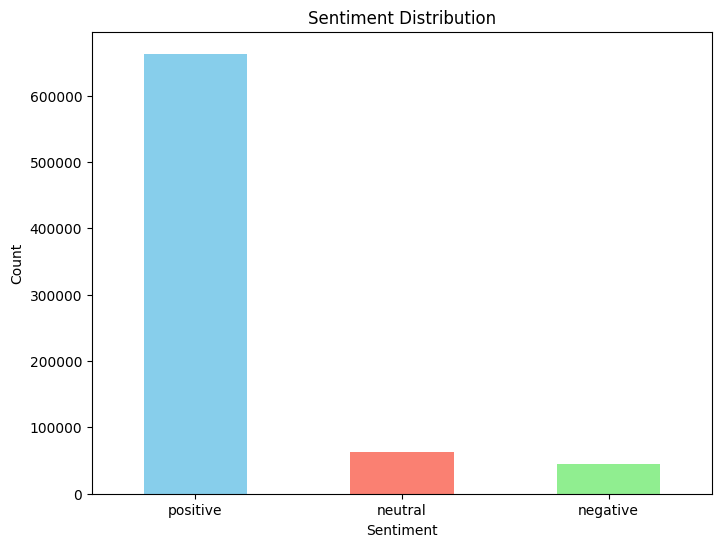

In [4]:

def plot_sentiment_distribution(dataset, sentiment_column='True_Sentiment'):

    # Count the number of each sentiment
    sentiment_counts = dataset[sentiment_column].value_counts()
    
    # Print counts
    print("Sentiment counts:\n", sentiment_counts)
    
    # Plot the counts as a bar chart
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
    
    # Add title and labels
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    
    # Add sentiment labels to x-axis ticks
    plt.xticks(ticks=range(len(sentiment_counts.index)), labels=sentiment_counts.index, rotation=0)
    
    # Show plot
    plt.show()

plot_sentiment_distribution(dataset)

Dataset is Unbalanced is necessary to deal with it
To deal with this I'm gonna reduce the number of positive and neutral reviews to equal the number of negative

In [5]:

def balance_dataframe(dataset, sentiment_column='True_Sentiment', random_state=42):
    
    # Count the number of entries for each sentiment type
    sentiment_counts = dataset[sentiment_column].value_counts()
    print("Sentiment counts before balancing:\n", sentiment_counts)
    
    # Determine the target number of entries based on the smallest class
    min_samples = sentiment_counts.min()
    
    # Sample the same number of entries for each sentiment type
    balanced_data = pd.DataFrame()
    
    for sentiment in sentiment_counts.index:
        if sentiment_counts[sentiment] >= min_samples:
            subset = dataset[dataset[sentiment_column] == sentiment].sample(n=min_samples, random_state=random_state)
        else:
            subset = dataset[dataset[sentiment_column] == sentiment]
            print(f"Warning: Not enough samples for sentiment '{sentiment}'. Only {len(subset)} entries available.")
        
        balanced_data = pd.concat([balanced_data, subset])
    
    # Shuffle the resulting balanced DataFrame
    balanced_data = balanced_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Print counts after balancing
    print("Sentiment counts after balancing:\n", balanced_data[sentiment_column].value_counts())
    
    return balanced_data

# Example usage with a DataFrame named 'dataset'
# dataset = pd.read_csv('your_dataset.csv')  # Load your dataset here

# Balance the DataFrame
balanced_df = balance_dataframe(dataset)

print(f'Number of entries in the balanced DataFrame: {len(balanced_df)}')

# Now you can use the balanced_df DataFrame for further processing

Sentiment counts before balancing:
 True_Sentiment
positive    663084
neutral      62609
negative     45300
Name: count, dtype: int64
Sentiment counts after balancing:
 True_Sentiment
neutral     45300
negative    45300
positive    45300
Name: count, dtype: int64
Number of entries in the balanced DataFrame: 135900


Sentiment counts:
 True_Sentiment
neutral     45300
negative    45300
positive    45300
Name: count, dtype: int64


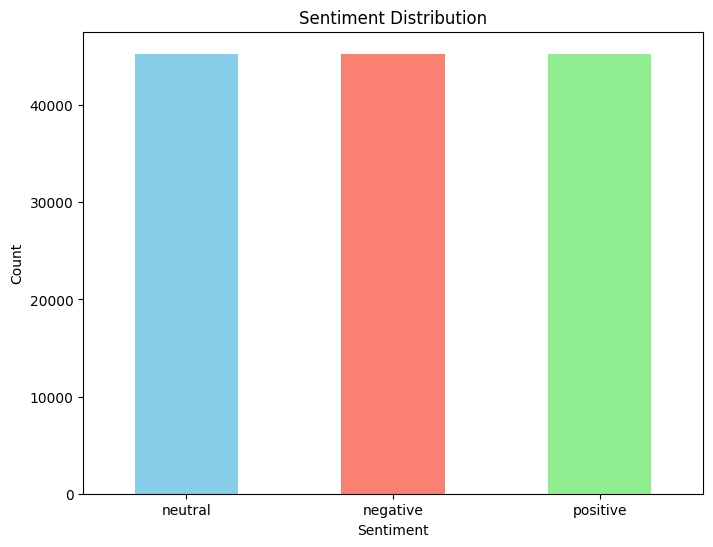

In [7]:
plot_sentiment_distribution(balanced_df)

In [9]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135900 entries, 0 to 135899
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   title                 135900 non-null  object 
 1   text                  135900 non-null  object 
 2   date                  135900 non-null  object 
 3   hotel_class           135900 non-null  float64
 4   name                  135900 non-null  object 
 5   region                135900 non-null  object 
 6   clean_text            135900 non-null  object 
 7   service               135900 non-null  float64
 8   cleanliness           135900 non-null  float64
 9   overall               135900 non-null  float64
 10  value                 135900 non-null  float64
 11  location              135900 non-null  float64
 12  sleep_quality         135900 non-null  float64
 13  rooms                 135900 non-null  float64
 14  True_Sentiment        135900 non-null  object 
 15  

In [10]:
# Check if the dataset contains any NaN values
if dataset.isna().any().any():
    print("The dataset contains NaN values.")
else:
    print("The dataset does not contain any NaN values.")

The dataset does not contain any NaN values.


Classification with tf-idf

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Map sentiment labels to numeric values
balanced_df['Value_True_sentiment'] = balanced_df['True_Sentiment'].map({'positive': 1, 'negative': -1,'neutral':0})

# Example preprocessing: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(balanced_df['text'], balanced_df['Value_True_sentiment'], test_size=0.3, random_state=42)


# Transform text data to TF-IDF features
vectorizer = TfidfVectorizer(
    stop_words='english', # Remove English stop words
    max_df=0.95,   # Ignore terms that appear in more than 95% of documents
    min_df=5,  # Ignore terms that appear in fewer than 5 reviews
    max_features=5000,  # Keep only the top 5000 features
    ngram_range=(1, 1), # Use unigrams only
    sublinear_tf=True) # Apply sublinear term frequency scaling

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the model with multi-class classification
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Get feature names and weights
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_

# Create a DataFrame for each class with feature names and their corresponding weights
weights_df = pd.DataFrame({'feature': feature_names})
weights_df['negative'] = weights[0]
weights_df['neutral'] = weights[1]
weights_df['positive'] = weights[2]

# Sort the DataFrame by weights for each class
top_positive = weights_df[['feature', 'positive']].sort_values(by='positive', ascending=False).head(10)
top_negative = weights_df[['feature', 'negative']].sort_values(by='negative', ascending=False).head(10)
top_neutral = weights_df[['feature', 'neutral']].sort_values(by='neutral', ascending=False).head(10)

print('Top positive features:')
print(top_positive)
print('\nTop negative features:')
print(top_negative)
print('\nTop neutral features:')
print(top_neutral)

Accuracy: 68.10%
              precision    recall  f1-score   support

    negative       0.65      0.66      0.65     13693
     neutral       0.55      0.52      0.54     13456
    positive       0.84      0.85      0.85     13621

    accuracy                           0.68     40770
   macro avg       0.68      0.68      0.68     40770
weighted avg       0.68      0.68      0.68     40770

Top positive features:
          feature  positive
2035        great  5.332092
3220      perfect  4.492608
1655    excellent  4.022049
1015  comfortable  3.975687
948         clean  3.691307
2163     hesitate  3.262201
3297   pleasantly  3.237196
2676        loved  3.118644
1602      enjoyed  3.117189
4939    wonderful  2.975404

Top negative features:
         feature  negative
3121  overpriced  3.814893
4960       worst  3.674070
2222    horrible  2.858312
1391       dirty  2.772778
2887       money  2.715014
1410  disgusting  2.704887
4447    terrible  2.669856
1804      filthy  2.646701
3777